# Section 22: K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


(0.0, 1000.0)

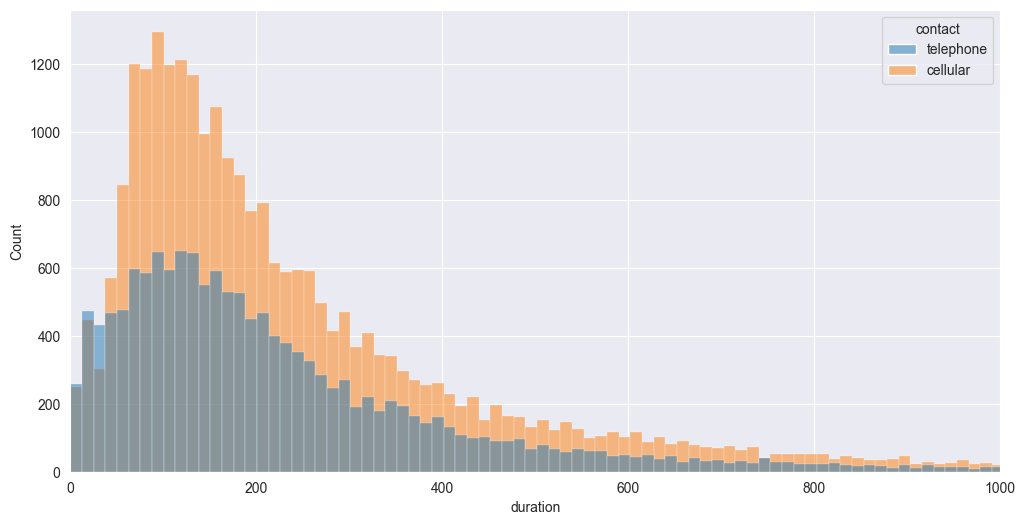

In [6]:
plt.figure(figsize=(12, 6))

sns.histplot(df, x='duration', hue='contact')

plt.xlim(0, 1000)

<AxesSubplot: xlabel='contact', ylabel='count'>

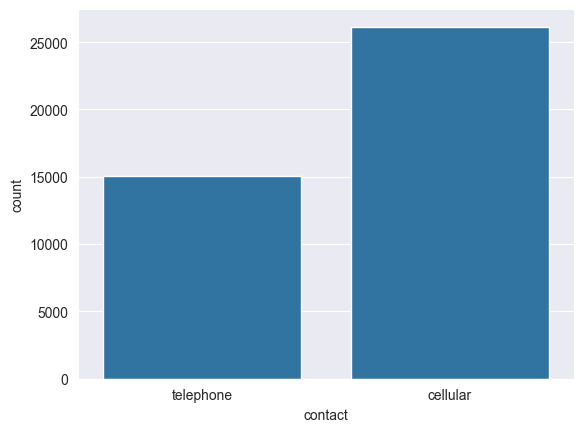

In [7]:
sns.countplot(df, x='contact')

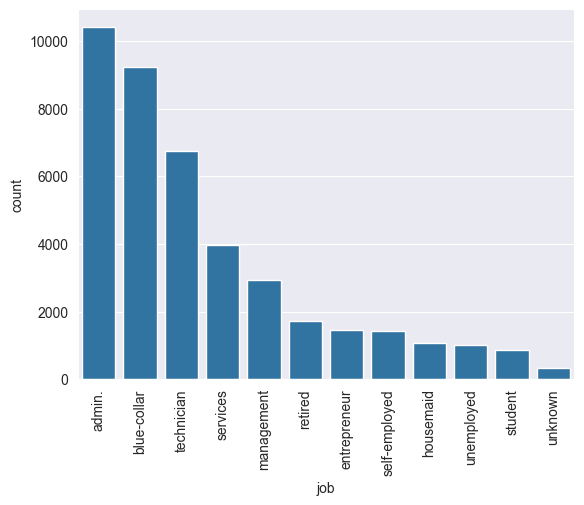

In [8]:
sns.countplot(df, x='job', order=df['job'].value_counts().index)

plt.xticks(rotation=90);

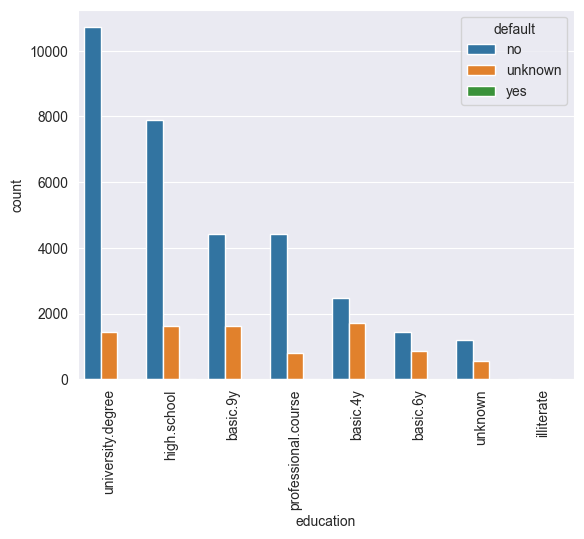

In [9]:
sns.countplot(df, x='education', order=df['education'].value_counts().index, hue='default')

plt.xticks(rotation=90);

<AxesSubplot: xlabel='default', ylabel='count'>

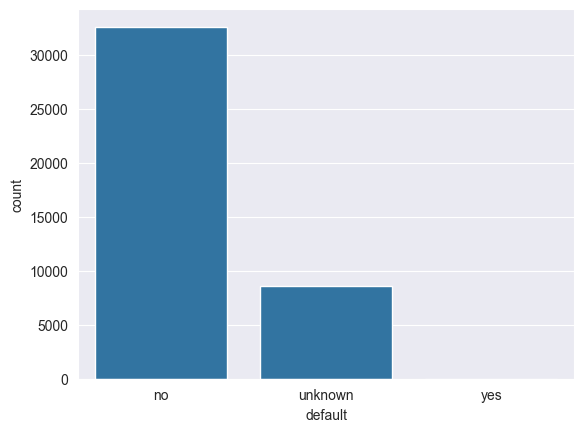

In [10]:
sns.countplot(df, x='default')

In [11]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [12]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

## Clustering

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
X = pd.get_dummies(df)

In [15]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [16]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [17]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t

In [18]:
model = KMeans(n_clusters=2)

In [19]:
cluster_labels = model.fit_predict(scaled_X)

In [20]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [21]:
X['Cluster'] = cluster_labels

<AxesSubplot: >

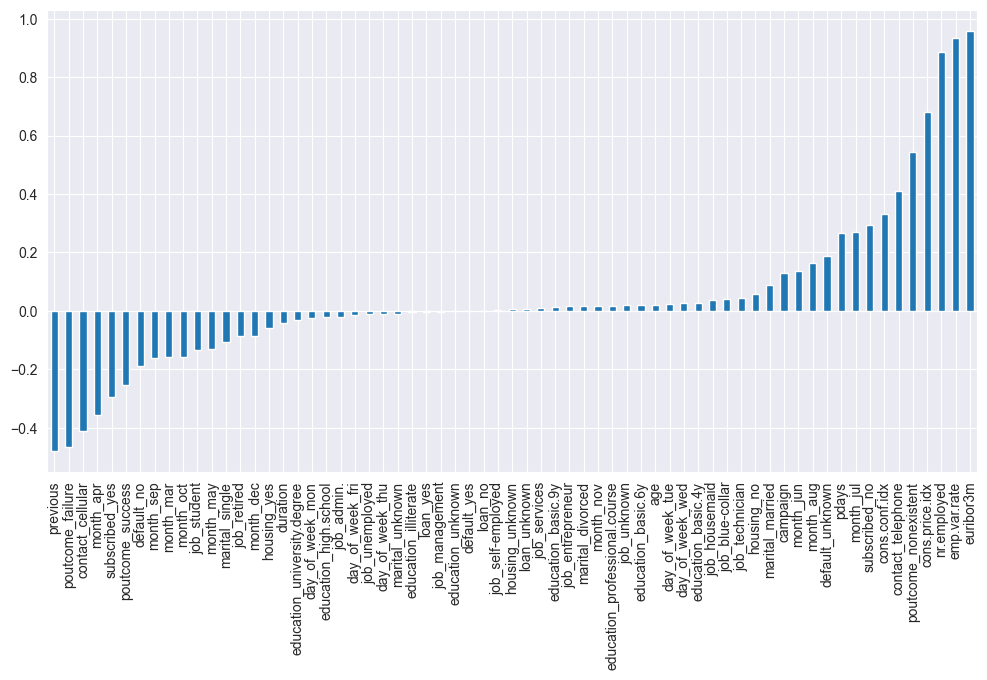

In [22]:
plt.figure(figsize=(12, 6))

X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [23]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)

    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [24]:
ssd

[2469792.4571073153,
 2370786.4867077554,
 2327406.8699438777,
 2272527.7159267133,
 2212984.4548050277,
 2172340.8007022287,
 2091079.1307773835,
 2011283.900104664]

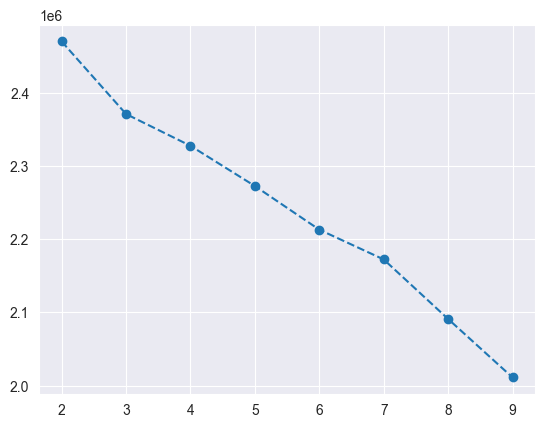

In [25]:
plt.plot(range(2, 10), ssd, 'o--')

In [26]:
pd.Series(ssd).diff()

0             NaN
1   -99005.970400
2   -43379.616764
3   -54879.154017
4   -59543.261122
5   -40643.654103
6   -81261.669925
7   -79795.230673
dtype: float64

## Color Quantization

In [27]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [28]:
image_as_array.shape

(1401, 934, 3)

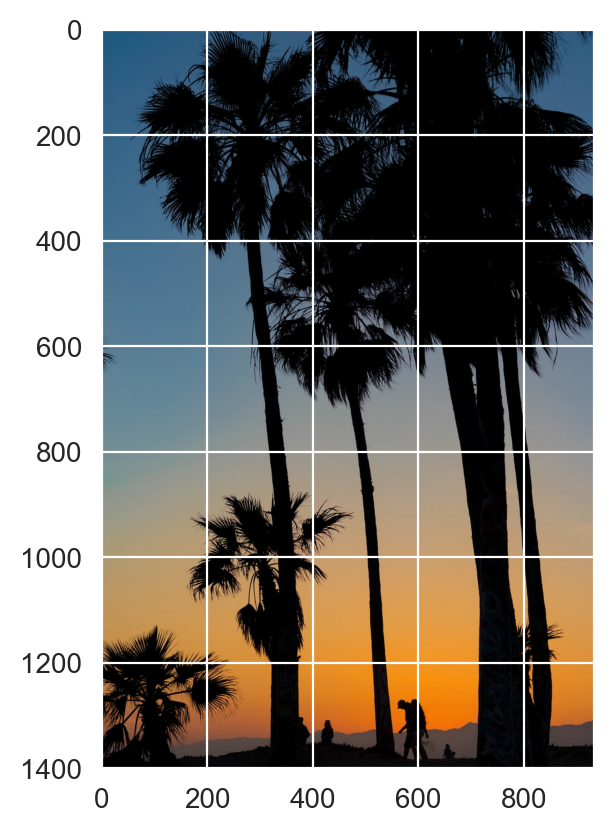

In [29]:
plt.figure(dpi=200)

plt.imshow(image_as_array)

In [30]:
(h, w, c) = image_as_array.shape

In [31]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [32]:
image_as_array2d.shape

(1308534, 3)

In [33]:
model = KMeans(n_clusters=6)

In [34]:
labels = model.fit_predict(image_as_array2d)

In [35]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [36]:
rgb_codes

array([[  3,   3,   4],
       [193, 154, 108],
       [ 72, 110, 138],
       [219, 135,  46],
       [138, 144, 144],
       [ 67,  62,  62]])

In [37]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [38]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

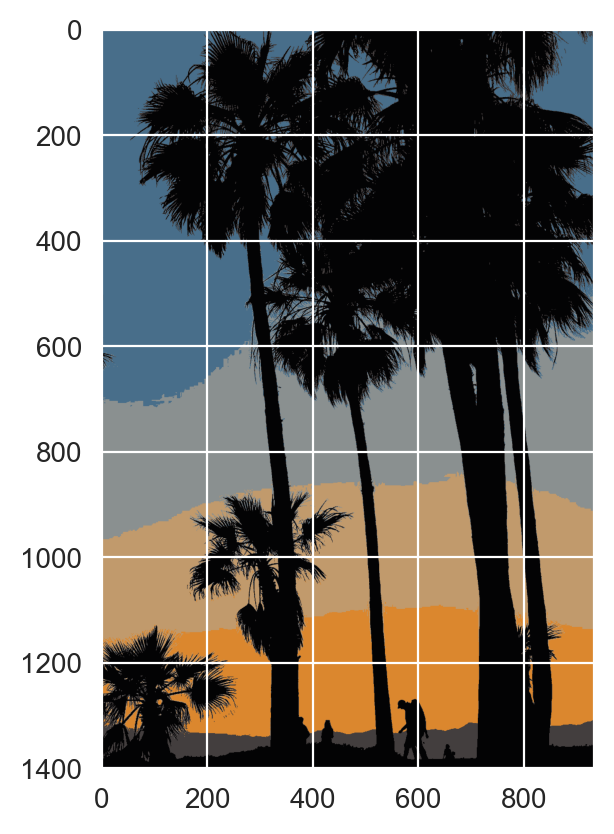

In [39]:
plt.figure(dpi=200)

plt.imshow(quantized_image)

## Exercises

In [40]:
df = pd.read_csv('CIA_Country_Facts.csv')

In [41]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


<AxesSubplot: xlabel='Population', ylabel='Count'>

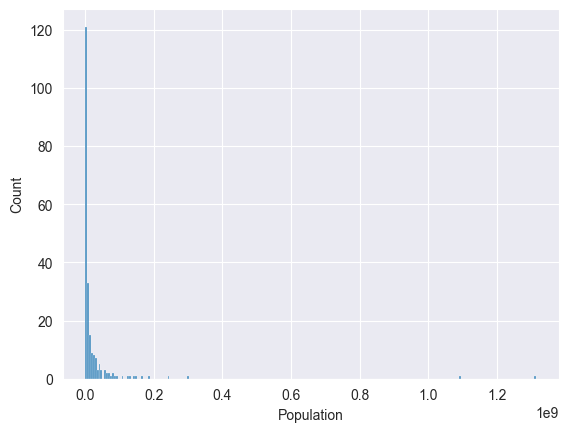

In [44]:
sns.histplot(df, x='Population')

<AxesSubplot: xlabel='Population', ylabel='Count'>

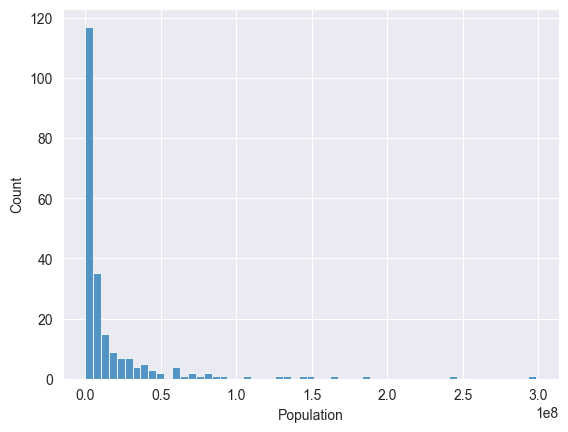

In [45]:
sns.histplot(df[df['Population'] < 500000000], x='Population')

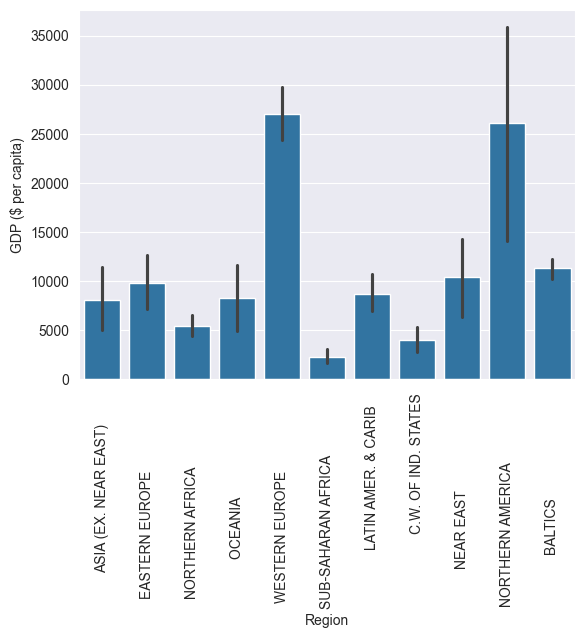

In [46]:
sns.barplot(df, x='Region', y='GDP ($ per capita)')

plt.xticks(rotation=90);

<AxesSubplot: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

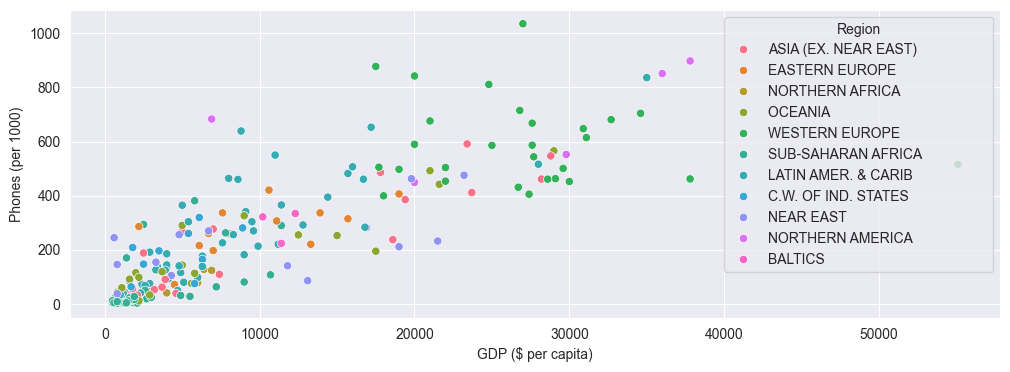

In [47]:
plt.figure(figsize=(12, 4))

sns.scatterplot(df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')

<AxesSubplot: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

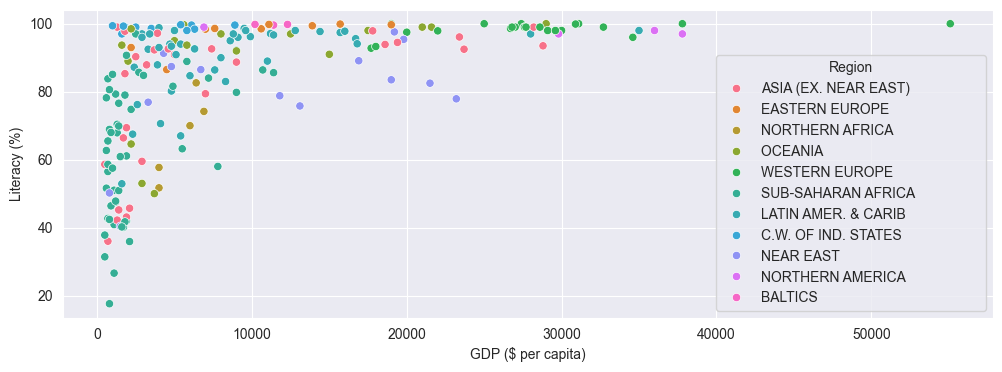

In [48]:
plt.figure(figsize=(12, 4))

sns.scatterplot(df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')

<AxesSubplot: >

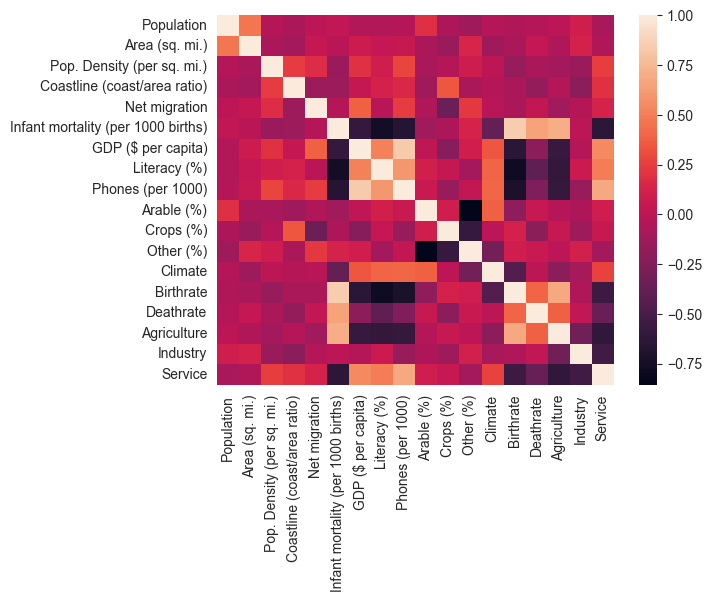

In [49]:
sns.heatmap(df.corr(numeric_only=True))

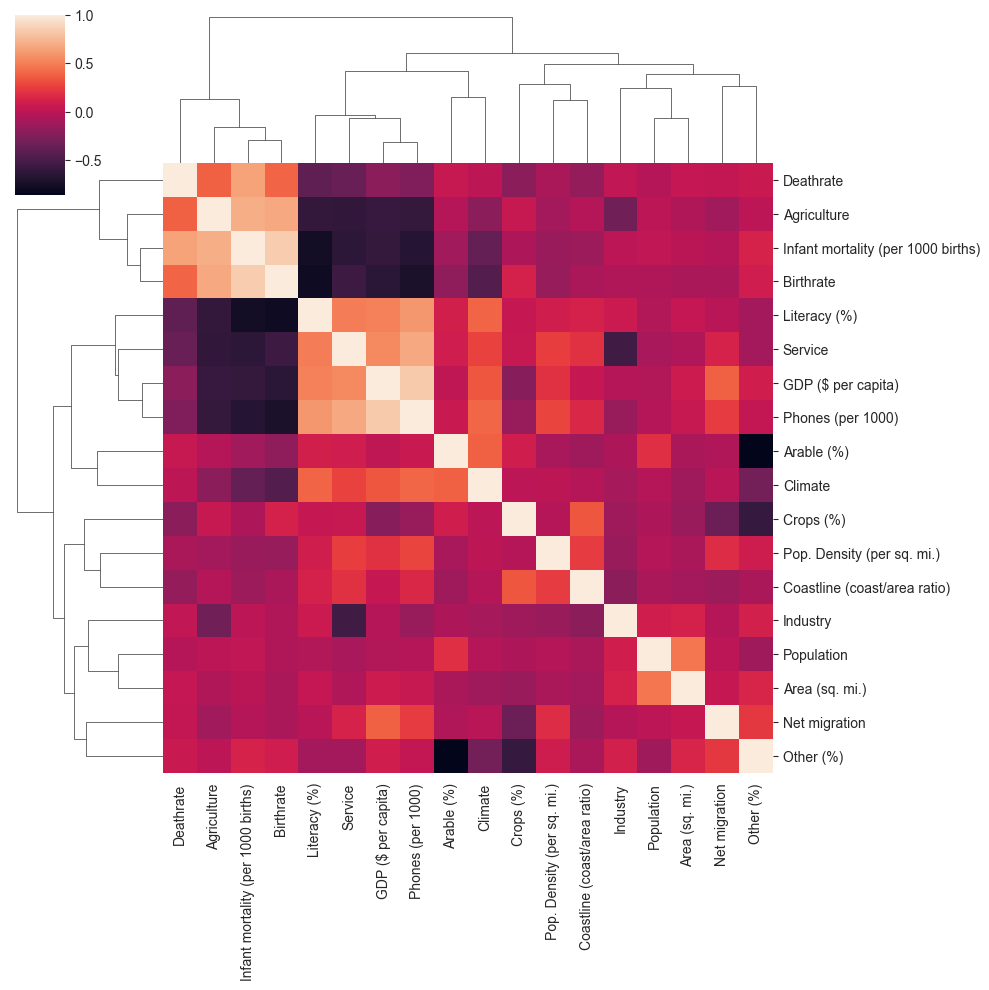

In [50]:
sns.clustermap(df.corr(numeric_only=True))

In [51]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [52]:
df[df['Agriculture'].isna()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [53]:
df[df['Agriculture'].isna()] = df[df['Agriculture'].isna()].fillna(0)

In [54]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [55]:
climate_mean = df.groupby('Region')['Climate'].mean()
climate_mean

Region
ASIA (EX. NEAR EAST)                   1.962963
BALTICS                                3.000000
C.W. OF IND. STATES                    2.550000
EASTERN EUROPE                         3.111111
LATIN AMER. & CARIB                    2.033333
NEAR EAST                              1.666667
NORTHERN AFRICA                        1.500000
NORTHERN AMERICA                       1.500000
OCEANIA                                2.000000
SUB-SAHARAN AFRICA                     1.846939
WESTERN EUROPE                         2.826087
Name: Climate, dtype: float64

In [56]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [57]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [58]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [59]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [60]:
df = df.dropna()

In [61]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [62]:
df = df.drop('Country', axis=1)

In [63]:
X = pd.get_dummies(df)

In [64]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [65]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [66]:
ssd = []

for k in range(2, 30):
    model = KMeans(n_clusters=k)

    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [67]:
ssd

[5602.182218158086,
 5010.242236416017,
 4671.163242477844,
 4481.600430302826,
 4121.962060890055,
 3957.996354406041,
 3557.843260172841,
 3423.13064812109,
 3137.0868564311554,
 2995.4742512109915,
 2804.7523869568013,
 2667.9273801064805,
 2320.7820960596973,
 2273.945514121793,
 2069.9834765171154,
 1984.2905461981427,
 2147.57425232219,
 1900.0441938506196,
 1854.4329859290324,
 1806.1991591125948,
 1660.245487125818,
 1599.1863779322023,
 1654.0573440480528,
 1567.026329354264,
 1447.6427681616142,
 1440.4501657126937,
 1365.939178167176,
 1415.2617353164806]

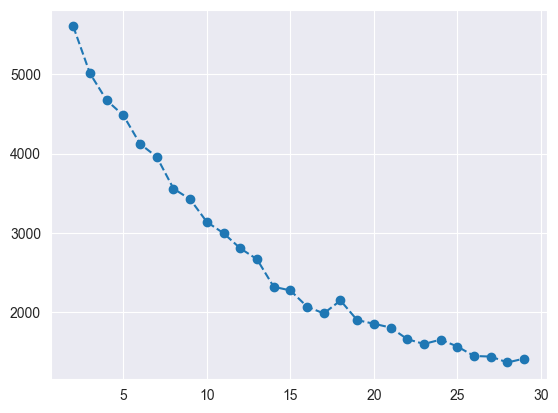

In [68]:
plt.plot(range(2, 30), ssd, 'o--')

In [69]:
diffs = pd.Series(ssd).diff()

<AxesSubplot: >

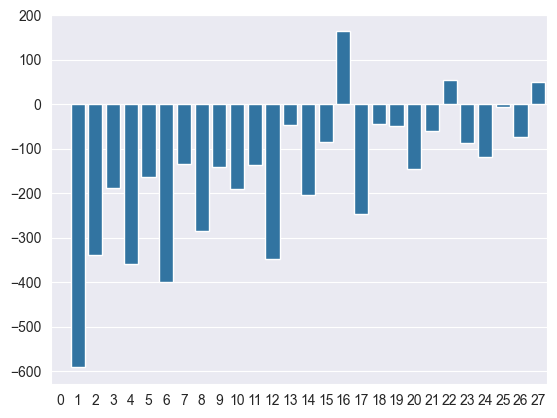

In [70]:
sns.barplot(diffs)

In [71]:
model = KMeans(n_clusters=3)

model.fit(scaled_X)

KMeans(n_clusters=3)

In [72]:
model.labels_

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int32)

In [73]:
X['Cluster'] = model.labels_

In [74]:
X.corr()['Cluster'].sort_values()

Birthrate                                    -0.792489
Infant mortality (per 1000 births)           -0.789245
Region_SUB-SAHARAN AFRICA                    -0.687145
Agriculture                                  -0.619370
Deathrate                                    -0.493342
Industry                                     -0.055672
Crops (%)                                    -0.047331
Other (%)                                     0.005381
Region_NEAR EAST                              0.006099
Region_BALTICS                                0.014609
Region_NORTHERN AFRICA                        0.020804
Region_ASIA (EX. NEAR EAST)                   0.025332
Region_EASTERN EUROPE                         0.028502
Region_C.W. OF IND. STATES                    0.029840
Region_LATIN AMER. & CARIB                    0.062970
Region_OCEANIA                                0.063398
Arable (%)                                    0.072169
Population                                    0.099905
Coastline 